<a href="https://colab.research.google.com/github/RubenAndreeB/challenge1_data-science_alura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [60]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

In [8]:
tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

La tienda 1 facturo: 1150880400.0
La tienda 2 facturo: 1116343500.0
La tienda 3 facturo: 1098019600.0
La tienda 4 facturo: 1038375700.0


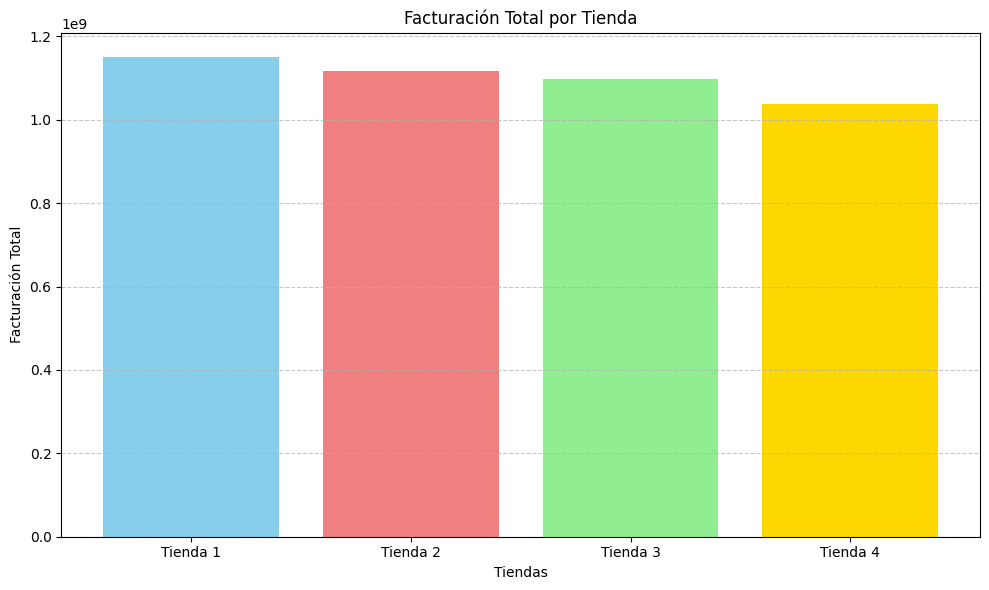

In [65]:
fact_tienda1 = tienda['Precio'].sum()
fact_tienda2 = tienda2['Precio'].sum()
fact_tienda3 = tienda3['Precio'].sum()
fact_tienda4 = tienda4['Precio'].sum()

print(f'La tienda 1 facturo: {fact_tienda1}')
print(f'La tienda 2 facturo: {fact_tienda2}')
print(f'La tienda 3 facturo: {fact_tienda3}')
print(f'La tienda 4 facturo: {fact_tienda4}')

facturacion = [fact_tienda1, fact_tienda2, fact_tienda3, fact_tienda4]

plt.figure(figsize=(10, 6))
plt.bar(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], facturacion, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel('Tiendas')
plt.ylabel('Facturación Total')
plt.title('Facturación Total por Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [37]:
tienda['Categoría del Producto'].value_counts().sort_values(ascending=False)


,count
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


In [36]:
tienda2['Categoría del Producto'].value_counts().sort_values(ascending=False)

,count
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181


In [38]:
tienda3['Categoría del Producto'].value_counts().sort_values(ascending=False)

,count
Categoría del Producto,
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Instrumentos musicales,177
Artículos para el hogar,177


In [39]:
tienda4['Categoría del Producto'].value_counts().sort_values(ascending=False)

,count
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


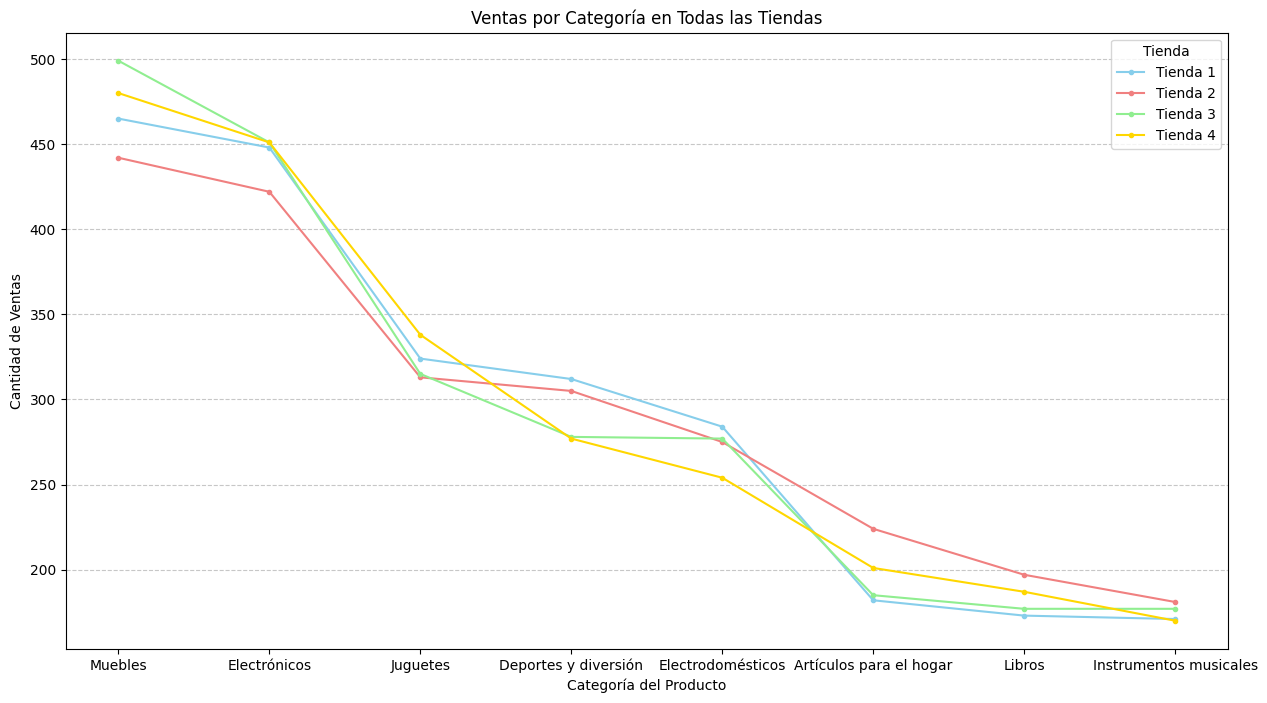

In [133]:
stores = {'Tienda 1': tienda, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}

plt.figure(figsize=(15, 8))
colores = ['skyblue', 'lightcoral', 'lightgreen', 'gold']
for i, (name, df) in enumerate(stores.items()):
    category_counts = df['Categoría del Producto'].value_counts().sort_values(ascending=False)
    category_counts.plot(kind='line', color=colores[i], label=name, marker='.')

plt.title('Ventas por Categoría en Todas las Tiendas')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad de Ventas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tienda')
plt.show()

# 3. Calificación promedio de la tienda


En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [45]:
cal_tienda = tienda['Calificación'].mean()
cal_tienda2 = tienda2['Calificación'].mean()
cal_tienda3 = tienda3['Calificación'].mean()
cal_tienda4 = tienda4['Calificación'].mean()

# Crear una lista con las calificaciones promedio para iterar sobre ellas
calificaciones = [cal_tienda, cal_tienda2, cal_tienda3, cal_tienda4]

for i, cal in enumerate(calificaciones):
    print(f'La tienda {i+1} tiene una calificación promedio de: {cal:.2f}')

La tienda 1 tiene una calificación promedio de: 3.98
La tienda 2 tiene una calificación promedio de: 4.04
La tienda 3 tiene una calificación promedio de: 4.05
La tienda 4 tiene una calificación promedio de: 4.00


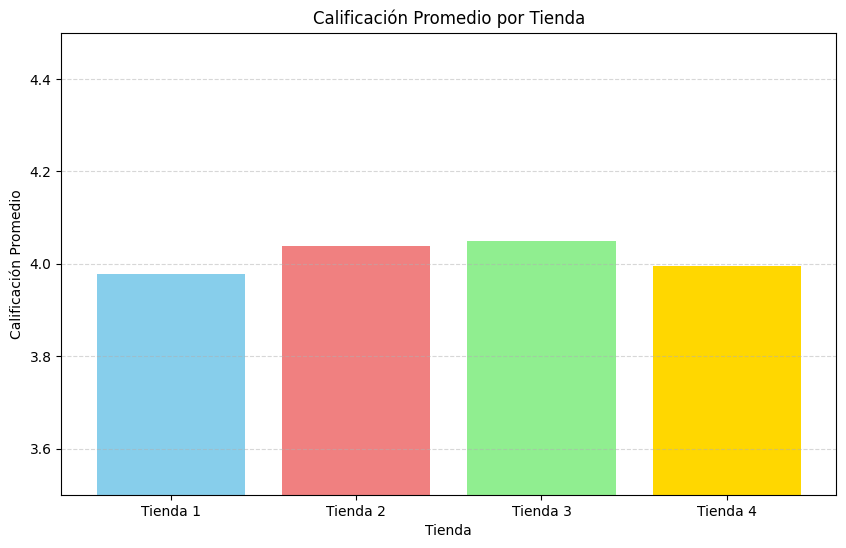

In [123]:
calificaciones_promedio = [cal_tienda, cal_tienda2, cal_tienda3, cal_tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.figure(figsize=(10, 6)) # Aumentar el tamaño para un gráfico horizontal
plt.bar(nombres_tiendas, calificaciones_promedio, color=colores)
plt.ylabel('Calificación Promedio')
plt.xlabel('Tienda')
plt.title('Calificación Promedio por Tienda')
plt.ylim(3.5, 4.5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# 4. Productos más y menos vendidos

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [116]:
muestra = 10 # Muestra de productos, considere 5 como adecuados
stores = {'Tienda 1': tienda, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}

for name, df in stores.items():
    print(f'\n--- {name} ---')
    print(f'Top 5 productos más vendidos:')
    print(df['Producto'].value_counts().sort_values(ascending=False).head(muestra))
    print(f'\nTop 5 productos menos vendidos:')
    print(df['Producto'].value_counts().sort_values(ascending=True).head(muestra))


--- Tienda 1 ---
Top 5 productos más vendidos:
Producto
Microondas                 60
TV LED UHD 4K              60
Armario                    60
Secadora de ropa           58
Mesa de noche              56
Bloques de construcción    56
Balón de baloncesto        55
Bicicleta                  54
Vaso térmico               54
Refrigerador               54
Name: count, dtype: int64

Top 5 productos menos vendidos:
Producto
Auriculares con micrófono      33
Celular ABXY                   33
Olla de presión                35
Pandereta                      36
Mochila                        39
Ciencia de datos con Python    39
Cuerda para saltar             40
Asistente virtual              40
Muñeca bebé                    40
Dinosaurio Rex                 40
Name: count, dtype: int64

--- Tienda 2 ---
Top 5 productos más vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta               

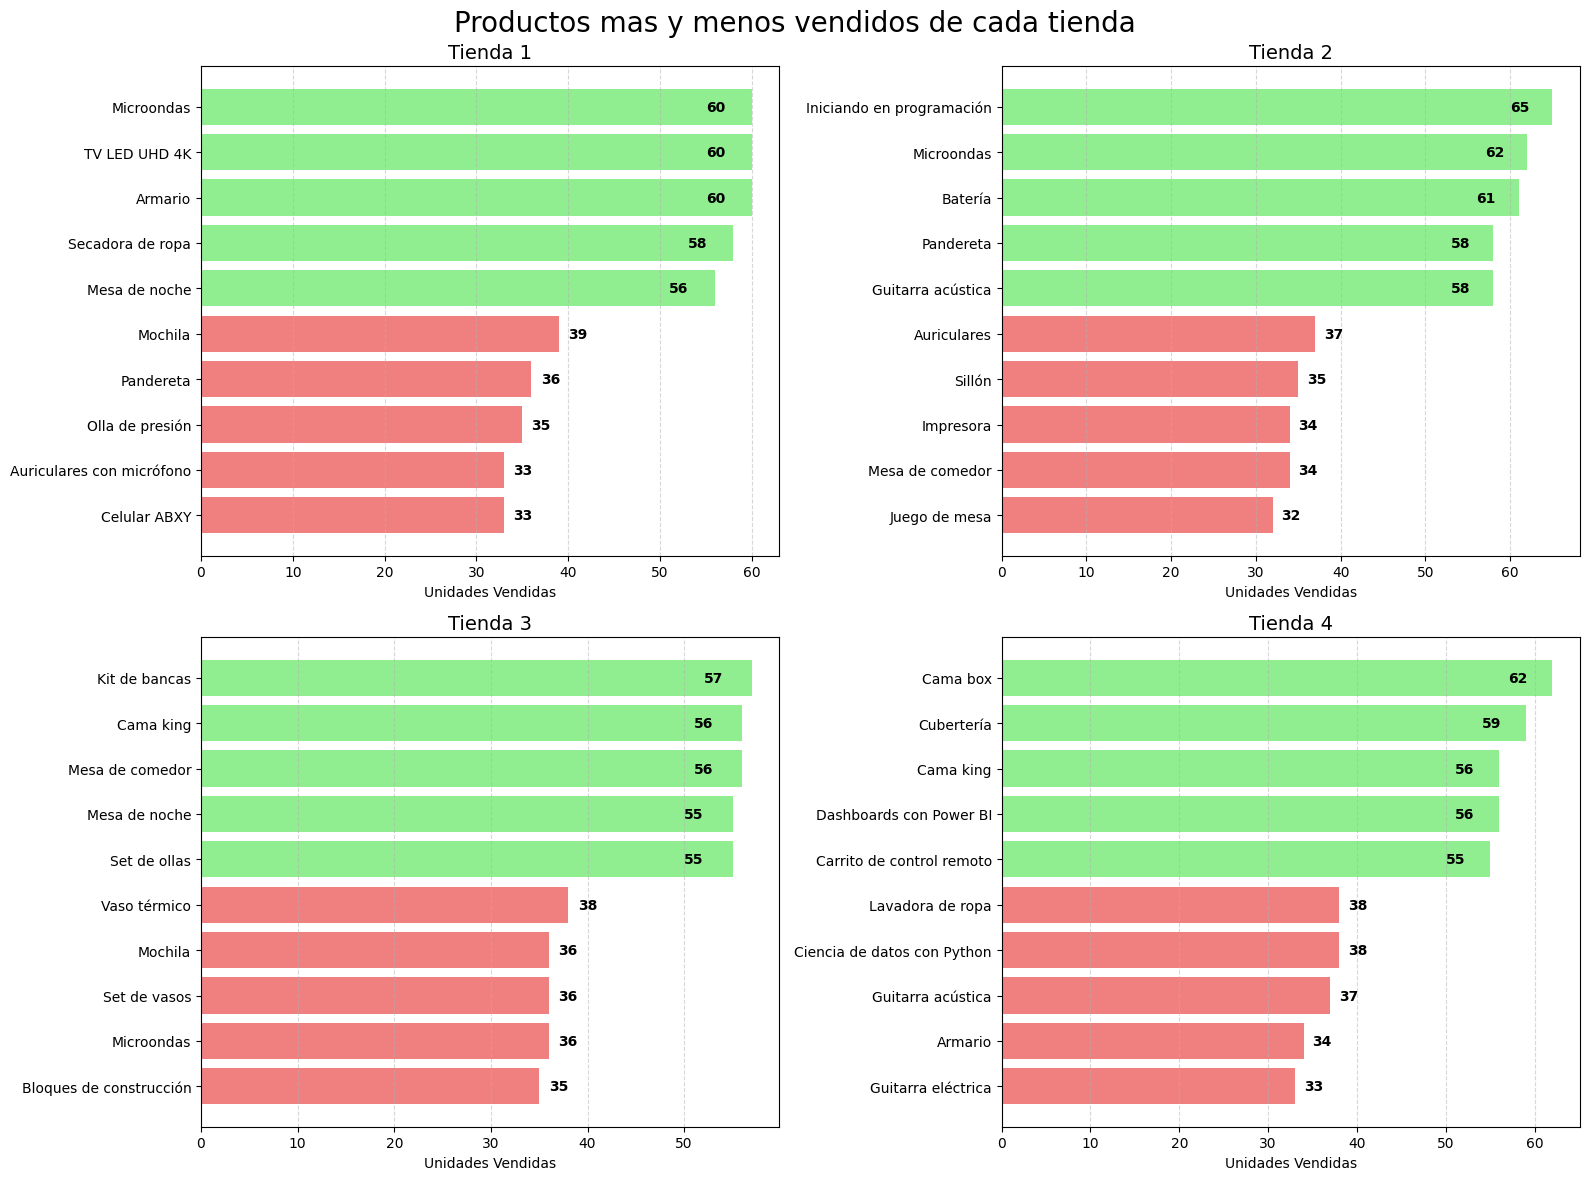

In [119]:
muestra = 5
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Productos mas y menos vendidos de cada tienda', fontsize=20)
axes = axes.flatten()

for i, (name, df) in enumerate(stores.items()):
    top_v = df['Producto'].value_counts().sort_values(ascending=False).head(muestra)
    bottom_v = df['Producto'].value_counts().sort_values(ascending=True).head(muestra)

    ax = axes[i]
    combined = pd.concat([top_v, bottom_v]).sort_values(ascending=True)
    colores_productos_vendidos = ['lightcoral'] * muestra + ['lightgreen'] * muestra
    barras = ax.barh(combined.index, combined.values, color=colores_productos_vendidos)

    ax.set_title(name, fontsize=14)
    ax.set_xlabel('Unidades Vendidas')
    ax.grid(axis='x', linestyle='--', alpha=0.5)

    for barra in barras:
        ancho = barra.get_width()
        pos_x = ancho - 5 if ancho > 50 else ancho + 1
        color_txt = 'black'
        ax.text(pos_x, barra.get_y() + barra.get_height()/2, f'{int(ancho)}', va='center', color=color_txt, fontweight='bold')

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [57]:
for name, df in stores.items():
    avg_shipping = df['Costo de envío'].mean()
    print(f'El costo de envío promedio para {name} es: {avg_shipping:.2f}')

El costo de envío promedio para Tienda 1 es: 26018.61
El costo de envío promedio para Tienda 2 es: 25216.24
El costo de envío promedio para Tienda 3 es: 24805.68
El costo de envío promedio para Tienda 4 es: 23459.46


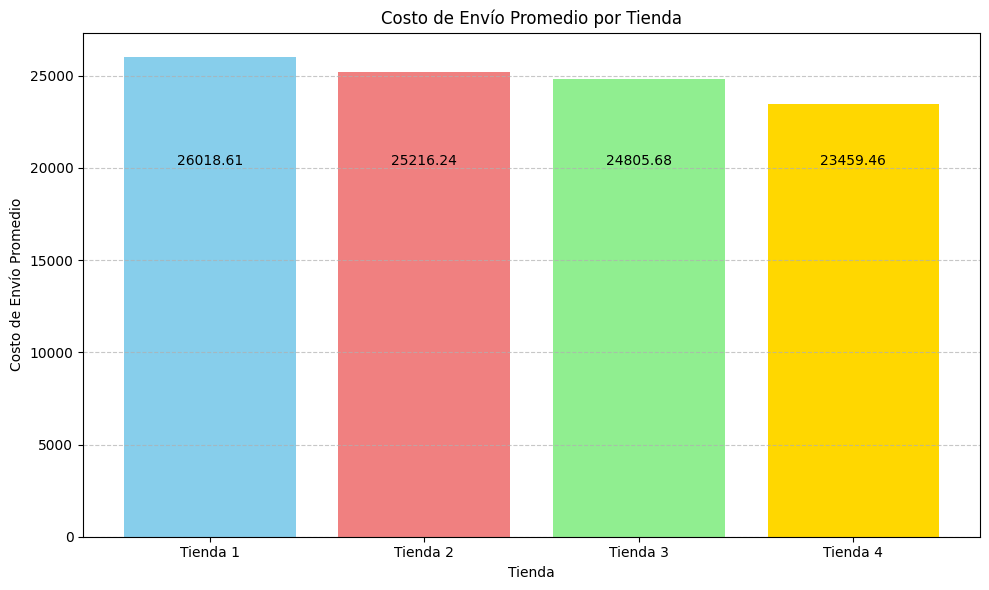

In [137]:
nombres = list(stores.keys())
costos = [df['Costo de envío'].mean() for df in stores.values()]

plt.figure(figsize=(10, 6))
bars = plt.bar(nombres, costos, color=colores)
plt.ylabel('Costo de Envío Promedio')
plt.xlabel('Tienda')
plt.title('Costo de Envío Promedio por Tienda')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, 20000, f'{yval:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Informe final

## Introduccion
El objetivo de este análisis fue evaluar el desempeño operativo y comercial de las cuatro sucursales de Alura Store Latam. Se procesaron los datos históricos de facturación, categorías y productos más y menos vendidas de cada tienda, satisfacción del cliente y costos de entrega para identificar qué activo aporta menor valor al grupo y determinar cuál debería ser la tienda elegida para desinversión (venta).

## Hallazgos Principales

### Ingresos Totales
Se identifico una clara jerarquia en la generacion dle flujo de caja donde:
- Tienda 1 (Lider): Genero a mayor facturacion con con **1,150,880,400 pesos**, demostrando una fuerte penetración de mercado.
- Tienda 4 (Rezagada): Presentó la facturación más baja del grupo con **1,038,375,700 pesos**. Existe una brecha de rendimiento de más de **112 millones de pesos** respecto a la tienda líder.


### Categorias de producto mas y menos vendidas
Todas tienen un rendimiento similar, aunque enfocandonos en estas dos tiendas mencionadas anteriormente, la tienda 4 tiene una menor cantidad de ventas en las categorias mas marginales comparandolas con las otras tiendas. Mientras que las otras tiendas fluctuan de manera estandar.

### Satisfaccion del cliente por producto en tienda
Esta categoria considero que es la mas superflua, debido a que todas oscilan con una calificacion entre **3.98 y 4.05**. Lo cual muestra una gran satisfaccion entre los clientes con una minima diferencia de **7 centesimas**.

### Productos mas y menos vendidos en cada tienda
Al hacer un analisis exhaustivo se concluyo en que los productos principales de venta en la **Tienda 4**. No cumplen con las expectativas de venta. Siendo esta la tienda con menor cantidad de ventas en los productos estrella.

### Costos de envio
Aunque la **Tienda 4** es la más eficiente en logística (Costo promedio: 23,459 pesos), su bajo volumen de ventas diluye esta ventaja competitiva. Por otro lado, la Tienda 1 tiene los costos más altos (26,018 pesos), lo cual es un área de oportunidad, pero aceptable dado su alto volumen de ingresos.

## Conclusion y recomendacion
Tras ponderar el volumen de ingresos frente a la eficiencia operativa, mi recomendación para el Sr. Juan es:

**Recomendacion: Vender la TIENDA 4**

**Justificación de la decision:**

A pesar de que la Tienda 4 mantiene buenos controles de costos de envío y una calificación de cliente aceptable (4.00), es la **menos rentable en términos de generación bruta de ingresos**.

En el modelo de negocio de retail, el volumen de ventas es crítico para la sostenibilidad. La **Tienda 4 factura un 9.7% menos que la tienda lider**, una diferencia de capital demasiado significativa **($112M)** que no logra ser compensada por sus ahorros en costos de envío.

**Estrategia sugerida:**
1.  Vender la Tienda 4 para liberar capital.
2.  Reinvertir parte de ese capital en la **Tienda 1** para optimizar su logística (bajar su costo de envío de $26k) y mejorar su atención al cliente (subir su 3.98), ya que es la tienda que demuestra mayor potencial de ventas.